In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

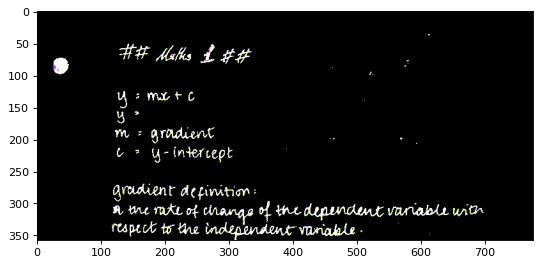

In [3]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

def preprocessImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower = np.array([0,0,0])
    upper = np.array([179, 255, 209])
    mask = cv2.inRange(image, lower, upper)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    image[close==0] = (255,255,255)
    retouch_mask = (image <= [250.,250.,250.]).all(axis=2)
    image[retouch_mask] = [0,0,0]
    image = 255-image
    return image

img = cv2.imread('./images2.png')
plt.figure(figsize=(8, 6), dpi=80)
img = preprocessImage(img)
plt.imshow(img)
plt.show()

In [39]:
for root, dirs, files in os.walk("..\Data\words"):
    for file in files:
        if file.endswith(".png"):
             print(os.path.join(root, file))

In [53]:
X = []
y = []
with open(r'..\Data\ascii\words.txt') as f:
    lines = f.readlines()
for line in lines:
    if not line.split(" ")[0][0] == '#':
        data = line.split(" ")
        l = data[0].split('-')
        X.append(f'..\data\words\{l[0]}\{l[0]}-{l[1]}\{data[0]}.png')
        y.append(data[-1].strip())


In [61]:
y[40]

'be'

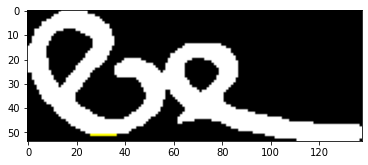

In [62]:
img = cv2.imread(X[40])
img = preprocessImage(img)
plt.imshow(img)
plt.show()

In [10]:
for root, dirs, files in os.walk("..\Data"):
    for file in files:
        if file.endswith(".png"):
             print(os.path.join(root, file))

6-115\r06-115-03-07.png
..\Data\words\r06\r06-115\r06-115-03-08.png
..\Data\words\r06\r06-115\r06-115-03-09.png
..\Data\words\r06\r06-115\r06-115-04-00.png
..\Data\words\r06\r06-115\r06-115-04-01.png
..\Data\words\r06\r06-115\r06-115-04-02.png
..\Data\words\r06\r06-115\r06-115-04-03.png
..\Data\words\r06\r06-115\r06-115-04-04.png
..\Data\words\r06\r06-115\r06-115-04-05.png
..\Data\words\r06\r06-115\r06-115-04-06.png
..\Data\words\r06\r06-115\r06-115-05-00.png
..\Data\words\r06\r06-115\r06-115-05-01.png
..\Data\words\r06\r06-115\r06-115-05-02.png
..\Data\words\r06\r06-115\r06-115-05-03.png
..\Data\words\r06\r06-115\r06-115-05-04.png
..\Data\words\r06\r06-115\r06-115-05-05.png
..\Data\words\r06\r06-115\r06-115-05-06.png
..\Data\words\r06\r06-115\r06-115-05-07.png
..\Data\words\r06\r06-115\r06-115-05-08.png
..\Data\words\r06\r06-115\r06-115-05-09.png
..\Data\words\r06\r06-115\r06-115-05-10.png
..\Data\words\r06\r06-115\r06-115-06-00.png
..\Data\words\r06\r06-115\r06-115-06-01.png
..\Data\